In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os, string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

import snowballstemmer
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
import re
from sklearn.pipeline import Pipeline

In [2]:
cd C:\Users\ACER\Documents\project\csv

C:\Users\ACER\Documents\project\csv


In [3]:
my_df = pd.read_csv("ekitidecidesclean.csv")

In [4]:
my_df['Sentiment'].value_counts()

positive    314
negative    257
neutral     151
Name: Sentiment, dtype: int64

In [5]:
my_df['predicted_sentiment'].value_counts()

positive    305
neutral     236
negative    181
Name: predicted_sentiment, dtype: int64

In [6]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.set_style(style='whitegrid')

In [7]:
df = my_df[['Content', 'Sentiment']].copy()

In [8]:
df.shape

(722, 2)

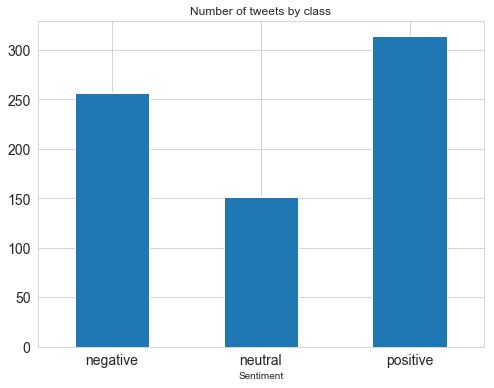

In [9]:
df.groupby(['Sentiment']).count().plot(kind='bar', figsize=(8, 6), rot=0, legend=False, title='Number of tweets by class');

In [10]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['Sentiment'])

## tokeninzing

In [11]:
#tokenizing
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
stemmer = snowballstemmer.EnglishStemmer()

def tokenize(s): 
    tokens = re_tok.sub(r' \1 ', s).split()
    return stemmer.stemWords(tokens)

In [12]:
#Train, test splitting
X_train, X_test, y_train, y_test = train_test_split(df['Content'].values, df['target'].values, test_size=0.25, random_state=0)

## TDIF

In [13]:

vect = TfidfVectorizer(strip_accents='unicode', tokenizer=tokenize, ngram_range=(1, 2), max_df=2, min_df=3, sublinear_tf=True,stop_words='english')

In [14]:
tfidf_train = vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(tfidf_train)
tfidf_test = vect.transform(X_test)
clf = MultinomialNB().fit(tfidf_train, y_train)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


ValueError: max_df corresponds to < documents than min_df

In [15]:
def naive_bayes(x, y):
    r = []; b = []
    labels = np.unique(y)

    for l in labels:
        other_l = labels[labels != l]
        p = x[y == l].sum(0) + 1
        q = x[(y == other_l[0]) | (y == other_l[1])].sum(0) + 1
        r.append(np.log((p/p.sum())/(q/q.sum())))
        b.append(np.log(len(p)/len(q)))
    
    return r, b

In [16]:
r, b = naive_bayes(tfidf_train, y_train)

pre_preds = []
for j in range(len(r)):
    pre_preds.append(np.asarray(tfidf_test @ r[j].T + b[j]).reshape(-1))
arr = np.array(pre_preds)

NameError: name 'tfidf_train' is not defined

In [ ]:
metrics.accuracy_score(y_test, np.argmax(arr.T, 1))

In [159]:
print(clf.predict(vect.transform(["The election was  good from the start."])))

[0]


In [160]:
clf.score(tfidf_test, y_test)

0.593103448275862

In [161]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf1 = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf1.fit(X_train_tfidf, y_train)

In [162]:
clf1.score(tfidf_test, y_test)

0.5586206896551724